In [1]:
import pandas as pd
import os
from scipy.interpolate import make_interp_spline
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [2]:
os.listdir()

['.gitignore',
 '.ipynb_checkpoints',
 'css_graph.gpickle',
 'Papers_AbsTokens.txt',
 'paper_subset',
 'README.md',
 'Week 4 - Networks I.ipynb',
 'Week 5 - full_css_network.png',
 'Week 5 - full_css_network_colored.png',
 'Week 5 - lcc_network.png',
 'Week 5 - Networks II.ipynb',
 'Week6.ipynb',
 'Week7-Copy1.ipynb',
 'Week7-Copy2.ipynb',
 'Week7.ipynb']

In [3]:
df_papers = pd.read_csv('Papers_AbsTokens.txt', index_col = 0)
df_papers.head(15)

,paperId,title,year,citationCount,externalIds.DOI,keywords,authorIds,author_fields,Abstract,Tokens Abstract
1,b30d4b44131698820ed05bcf7fb62c8fc6201672,Developing recommendations for designing smart...,2019,1.0,NaN,"['Computer Science', 'Sociology']",['1788563'],['Computer Science'],Cultural heritage carries the historical value...,"['cultural', 'heritage', 'carries', 'historica..."
2,9d59892c5657098bd3825116af8fad8d8ee943ff,Group Fairness for Indivisible Goods Allocation,2019,4.0,NaN,"['Economics', 'Computer Science']","['1749906', '4006636']","['Economics', 'Computer Science']",We consider the problem of fairly dividing a c...,"['consider', 'problem', 'fairly', 'dividing', ..."
3,867cc74781225da4e08a77fc35037ba77911e455,Hindsight Credit Assignment,2019,37.0,NaN,"['Economics', 'Computer Science']","['37666967', '144368601', '2605877', '3134710']","['Computer Science', 'Computer Science', 'Comp...",We consider the problem of efficient credit as...,"['consider', 'problem', 'efficient', 'credit',..."
4,37a0f28f6aa41028e64d0440001ff525d67c1305,The Constrained Round Robin Algorithm for Fair...,2019,9.0,NaN,"['Economics', 'Computer Science']","['144433798', '143999398']","['Economics', 'Computer Science']",We consider a multi-agent resource allocation ...,"['consider', 'multi-agent', 'resource', 'alloc..."
5,894b376090e1e843c79211603814ccbcab09f632,Interpretable Almost Matching Exactly With Ins...,2019,5.0,NaN,"['Economics', 'Computer Science']","['31938009', '48395540', '6974508']","['Computer Science', 'Computer Science', 'Comp...",Uncertainty in the estimation of the causal ef...,"['uncertainty', 'estimation', 'causal', 'effec..."
6,e15aea4ce4383a3fec52f90e6aaed5e457059020,Giant descendant trees and matching sets in th...,2019,1.0,NaN,"['Mathematics', 'Economics']",['1709874'],['Mathematics'],We study the $\delta$-version of the preferent...,"['study', '\\delta', '-version', 'preferential..."
7,1b2b319c88a3d0a4b220bf2bf5b1d6632b7ad7bc,Efficient Allocation of Free Stuff,2019,2.0,NaN,"['Economics', 'Computer Science']","['1684176', '145354960']","['Computer Science', 'Computer Science']",We study online matching settings with selfish...,"['study', 'online', 'matching', 'settings', 's..."
8,f0f6b42265feb5dd4200fdadf7529246e9a95ffc,Statistical experiments form a general framewo...,2019,0.0,NaN,"['Computer Science', 'Economics']","['2450616', '1740329']","['Economics', 'Mathematics']",We study repeated independent Blackwell experi...,"['study', 'repeated', 'independent', 'blackwel..."
9,89dbd5f282bae0317c0f85d64462b273dc27ebd7,Automatic Techniques to Systematically Discove...,2019,20.0,NaN,"['Computer Science', 'Economics']",['3254849'],['Computer Science'],Heap exploitation techniques to abuse the meta...,"['heap', 'exploitation', 'techniques', 'abuse'..."
10,75d918b05a021d534c624e7736d6d378c4d0751c,Optimal Bribery in Voting,2019,2.0,NaN,"['Economics', 'Computer Science']",['143892297'],['Computer Science'],Studying complexity of various bribery problem...,"['studying', 'complexity', 'various', 'bribery..."


In [4]:
import nltk, re, pprint
from nltk import word_tokenize
from nltk.corpus import stopwords
import string
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:

abstracts_list = df_papers['Abstract'].tolist()

In [6]:
#abstracts_list

In [7]:
tokens_list = []

for x in abstracts_list:
    try:
        tokens_list.append(word_tokenize(x))
    except:
        tokens_list.append(None)



In [8]:
len(tokens_list)

1448

In [9]:
def clean_tokens(x):
    sw_nltk = stopwords.words('english')
    punc = list(string.punctuation)
    #is_integer = [lambda s: s.isdigit() or (s[0] == '-' and s[1:].isdigit())]
    urls = [word for word in x if re.search(r'(?:http://)?\w+\.\S*[^.\s]',word)]
    out = [sw_nltk + punc + urls + ['https']]
    out = [item for sublist in out for item in sublist]
    try:
        clw = [word.lower() for word in x]
        cl = [word for word in clw if word not in out]
        cli =  [word for word in cl if not any(letter.isdigit() for letter in word)]
        
    except:
        pass
    #cli = filter(is_integer,cl)
    return cli

In [10]:
clean_tokens_list = []
for x in tokens_list:
    try:
        clean_tokens_list.append(clean_tokens(x))
    except:
        clean_tokens_list.append(None)




In [11]:
df_papers = pd.read_csv('Papers_AbsTokens.txt')

In [12]:
df_papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1448 entries, 0 to 1447
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       1448 non-null   int64  
 1   paperId          1448 non-null   object 
 2   title            1448 non-null   object 
 3   year             1448 non-null   int64  
 4   citationCount    1448 non-null   float64
 5   externalIds.DOI  0 non-null      float64
 6   keywords         1448 non-null   object 
 7   authorIds        1448 non-null   object 
 8   author_fields    1448 non-null   object 
 9   Abstract         1339 non-null   object 
 10  Tokens Abstract  1339 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 124.6+ KB


In [13]:
tokens_words = [x for x in clean_tokens_list if str(x) != 'None']
concat = [item for sublist in tokens_words for item in sublist]
tokens_concat =  [word for word in concat if word.isalpha()]


In [14]:
def frequency(tokens, unique, freq):
    #uniqueWords = []
    for i in tokens:
        if not i in unique:
            unique.append(i)
    
    
    #tokensFrequency = {}
    for i in unique:
        freq[i] = sum(1 for x in tokens if i == x)
        
    sorted_tokens = sorted(freq.items(), key=lambda x:x[1], reverse=True)
    sorted_dict = dict(sorted_tokens)
    
    return unique, freq, sorted_dict

In [15]:
uniqueWords = []
tokensFrequency = {}
sorted_dict = {}

uniqueWords, tokensFrquency, sorted_dict = frequency(tokens_concat, uniqueWords, tokensFrequency)

print(f'Number of unique words: {len(uniqueWords)}')

Number of unique words: 12311


In [16]:
def smoothify(yInput):
    x = np.array(range(0, depth))
    y = np.array(yInput)
    # define x as 600 equally spaced values between the min and max of original x
    x_smooth = np.linspace(x.min(), x.max(), 600) 
    # define spline with degree k=3, which determines the amount of wiggle
    spl = make_interp_spline(x, y, k=3)
    y_smooth = spl(x_smooth)
    # Return the x and y axis
    return x_smooth, y_smooth

In [17]:
def zipfGraph(sorted_dict, depth, texts):
    
    #plot zipfs curve
    
    figure(figsize=(12,10), dpi=80)
    ziffianCurveValues = [100/i for i in range(1, depth+1)]
    x, y = smoothify(ziffianCurveValues)
    plt.plot(x, y, label='Ziffian Curve', ls=':', color='grey')
    
    #plot tokens of text(s)
    
    
    if len(texts) == 1:
        sorted_list = list(sorted_dict.keys())
        words_plot = sorted_list[:depth]  
        sorted_values =  list(sorted_dict.values())
    
    
        maxValue = sorted_values[0]
        yAxis = [round(value / maxValue * 100) for value in sorted_values[:depth]]
        x, y = smoothify(yAxis)
        plt.plot(x, y, label=f' Tokens {texts[0]}', lw=1, alpha=0.5)
        plt.title('Top 50 Tokens')
        #plt.xticks(range(0, depth), words_plot)
        #plt.xticks(rotation='vertical')
        plt.legend()
        
    else:
        xAxis = [str(number) for number in range(1, depth+1)]
        #sorted_values =  list(sorted_dict[i].values())
        count = 0
        for i in sorted_dict:
            sorted_values =  list(sorted_dict[i].values())
            maxValue = list(sorted_dict[i].values())[0]
            yAxis = [round(value / maxValue * 100) for value in sorted_values[:depth]]
            x, y = smoothify(yAxis)
            plt.plot(x, y, label=f' Tokens {texts[count]}', lw=1, alpha=0.5)
            count +=1
            
            
        plt.title(f'Top {depth} Tokens')
        #plt.xticks(range(0, depth), xAxis)
        plt.legend()
        
        
    #plt.savefig('wordamounts.png', dpi=300)
    plt.show()
    

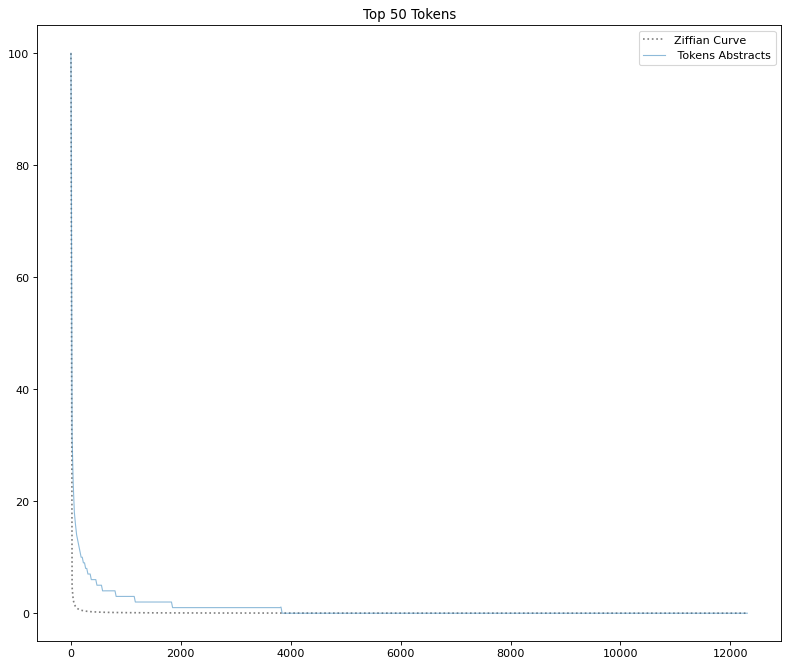

In [18]:
depth = 12311
texts = ['Abstracts']
zipfGraph(sorted_dict, depth,texts)

In [19]:
import random
import string

def random_string(n):
    count = 0
    s = ''
    while count < n:
        s += random.choice('jdal' + ' ')
        count += 1
    return s

n = 250526

s = random_string(n)
randt = [word_tokenize(s)]

randt = [item for sublist in randt for item in sublist]

len(randt)



40180

In [20]:
uniqueWords2 = []
tokensFrequency2 = {}
sorted_dict2 = {}

uniqueWords2, tokensFrquency2, sorted_dict2 = frequency(randt, uniqueWords2, tokensFrequency2)

print(f'Number of unique words: {len(uniqueWords2)}')

Number of unique words: 13622


In [21]:
texts = ['Abstracts', 'Random']
tokens = [sorted_dict, sorted_dict2]

texts_dict = dict(zip(texts, tokens))

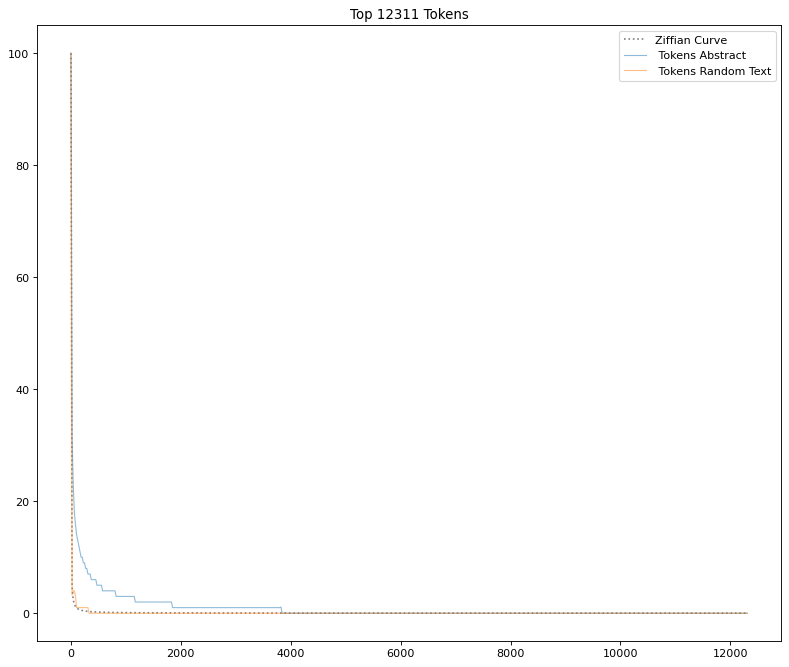

In [22]:
depth = 12311
texts = ['Abstract', 'Random Text']
zipfGraph(texts_dict, depth,texts)

In [23]:
from nltk.collocations import *


In [24]:

colloc_lists = []
#bestc_list=[]
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(tokens_concat)
#bestc_list.append(finder.nbest(bigram_measures.pmi, 10))
scored = finder.score_ngrams(bigram_measures.raw_freq)
#scored = finder.above_score(bigram_measures.raw_freq, 0.1)
colloc_lists.append(scored)
#clist.append(scored[])
#colloc_lists

In [25]:
colloc_list1 = [item for sublist in colloc_lists for item in sublist]


In [26]:
c_list = []
for i in colloc_list1:
    c_list.append(i[0]) 

In [27]:
len(c_list)

94698

In [28]:
len(c_list)

94698

In [29]:
'''
ct_list_full = []
count=0
for x in c_list:

    nii=0
    nio=0
    noi=0
    noo=0
        
    col = x
        
    for i in colloc_list:
            
        if i == col:
            nii = colloc_list1[count][1]*132917
    
        elif i[0] == col[0]:
            nio+=1
            
        elif i[1] == col[1]:
            noi+=1
            
        else:
            noo+=1
        
    ct = [nii,nio,noi,noo]
    ct_list_full.append(ct)
        
    count+=1
    print(count/len(c_list))
    
'''  
        

'\nct_list_full = []\ncount=0\nfor x in c_list:\n\n    nii=0\n    nio=0\n    noi=0\n    noo=0\n        \n    col = x\n        \n    for i in colloc_list:\n            \n        if i == col:\n            nii = colloc_list1[count][1]*132917\n    \n        elif i[0] == col[0]:\n            nio+=1\n            \n        elif i[1] == col[1]:\n            noi+=1\n            \n        else:\n            noo+=1\n        \n    ct = [nii,nio,noi,noo]\n    ct_list_full.append(ct)\n        \n    count+=1\n    print(count/len(c_list))\n    \n'

In [30]:
'''
file = open('contingency_tables.txt','w')
for item in ct_list_full:
    file.write(str(item))
file.close()
'''

"\nfile = open('contingency_tables.txt','w')\nfor item in ct_list_full:\n    file.write(str(item))\nfile.close()\n"

In [31]:
my_file = open(r"C:\Users\Owner\Downloads\Assignment2_CSS-main (1)\Assignment2_CSS-main\contingency_tables.txt", "r")

In [32]:
ct =my_file.read()

In [33]:
data_into_list = ct.replace(']', '];').split(';')
my_file.close()

In [34]:
ct_list = []
for x in data_into_list:
    i = x.split(',')
    i = [n.replace('[', '') for n in i]
    i = [n.replace(']', '') for n in i]
    i = [n.replace(' ', '') for n in i]
    try:
        i = [int(float(n)) for n in i]
        ct_list.append(i)
    except:
        ct_list.append(None)

In [35]:
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency
from scipy.stats import chisquare
from scipy.stats.contingency import expected_freq

In [36]:
pvalue_full = []

for x in ct_list:
    try:
        obs = [[x[0], x[1]], [x[2], x[3]]]  
        obs_exp = expected_freq(obs)
        pvalue = chisquare(obs, obs_exp).pvalue[1]
        
        pvalue_full.append(pvalue)
        
    except:
        pass

In [37]:
len(pvalue_full)

94698

In [38]:
dct = {w: x for w, x in zip(c_list, pvalue_full)}


In [39]:
sorted_pv = sorted(dct.items(), key=lambda x:x[1])
        
spv_dict = dict(sorted_pv)


In [40]:
test_list=[]
for key, value in spv_dict.items():
    temp = [key,value]
    test_list.append(temp)

In [41]:
spv_list=[]

for i in test_list:
    if i[1]<0.001:
        spv_list.append(i)
        
#spv_list

In [42]:
spv_dict = dict(spv_list)

In [43]:
from nltk.tokenize import MWETokenizer

In [44]:
cll = list(spv_dict.keys())
cll

[('machine', 'learning'),
 ('social', 'media'),
 ('reinforcement', 'learning'),
 ('united', 'states'),
 ('nash', 'equilibrium'),
 ('shapley', 'value'),
 ('fake', 'news'),
 ('artificial', 'intelligence'),
 ('decision', 'making'),
 ('et', 'al'),
 ('nash', 'equilibria'),
 ('observational', 'data'),
 ('voting', 'rules'),
 ('neural', 'networks'),
 ('imperfect', 'information'),
 ('est', 'destinée'),
 ('ouverte', 'pluridisciplinaire'),
 ('établissements', 'enseignement'),
 ('destinée', 'au'),
 ('français', 'ou'),
 ('laboratoires', 'publics'),
 ('niveau', 'recherche'),
 ('publiés', 'ou'),
 ('émanant', 'des'),
 ('étrangers', 'des'),
 ('pluridisciplinaire', 'hal'),
 ('scientifiques', 'de'),
 ('dépôt', 'et'),
 ('enseignement', 'et'),
 ('conclude', 'conclude'),
 ('causal', 'inference'),
 ('hal', 'est'),
 ('deposit', 'dissemination'),
 ('hal', 'open'),
 ('weak', 'ties'),
 ('au', 'dépôt'),
 ('des', 'laboratoires'),
 ('des', 'établissements'),
 ('non', 'émanant'),
 ('ou', 'privés'),
 ('ou', 'étranger

In [45]:
tokenizer = MWETokenizer(cll, separator = ' ')

In [46]:
tcabs = []

for x in clean_tokens_list:
    try:
        tcabs.append(tokenizer.tokenize(x))
    except:
        tcabs.append(None)

In [47]:
tcabs

[['cultural',
  'heritage',
  'carries',
  'historical',
  'values',
  'past',
  'cultural',
  'heritage',
  'therefore',
  'reflects',
  'identity',
  'societies',
  'thus',
  'important',
  'support',
  'people',
  'learn',
  'sites',
  'could',
  'achieved',
  'introducing',
  'new',
  'tools',
  'assist',
  'aspect',
  'designing',
  'tools',
  'could',
  'challenging',
  'need',
  'enhance',
  'visitors',
  '’',
  'engagement',
  'well',
  'enable',
  'explore',
  'sites',
  'smartly',
  'well-invested',
  'time',
  'rapid',
  'pace',
  'life',
  'paper',
  'presents',
  'development',
  'recommendations',
  'designing',
  'smart',
  'ubiquitous',
  'learning',
  'environments',
  'outdoor',
  'cultural',
  'heritage',
  'novel',
  'list',
  'design',
  'recommendations',
  'introduced',
  'result',
  'shaped',
  'throughout',
  'research',
  'project',
  'carried',
  'develop',
  'theoretical',
  'framework',
  'designing',
  'services',
  'fosle',
  'usercentred',
  'design',
  

In [48]:
df_papers["Tokens Abstract"] = tcabs

In [49]:
df_papers

,Unnamed: 0,paperId,title,year,citationCount,externalIds.DOI,keywords,authorIds,author_fields,Abstract,Tokens Abstract
0,1,b30d4b44131698820ed05bcf7fb62c8fc6201672,Developing recommendations for designing smart...,2019,1.0,NaN,"['Computer Science', 'Sociology']",['1788563'],['Computer Science'],Cultural heritage carries the historical value...,"[cultural, heritage, carries, historical, valu..."
1,2,9d59892c5657098bd3825116af8fad8d8ee943ff,Group Fairness for Indivisible Goods Allocation,2019,4.0,NaN,"['Economics', 'Computer Science']","['1749906', '4006636']","['Economics', 'Computer Science']",We consider the problem of fairly dividing a c...,"[consider, problem, fairly, dividing, collecti..."
2,3,867cc74781225da4e08a77fc35037ba77911e455,Hindsight Credit Assignment,2019,37.0,NaN,"['Economics', 'Computer Science']","['37666967', '144368601', '2605877', '3134710']","['Computer Science', 'Computer Science', 'Comp...",We consider the problem of efficient credit as...,"[consider, problem, efficient, credit, assignm..."
3,4,37a0f28f6aa41028e64d0440001ff525d67c1305,The Constrained Round Robin Algorithm for Fair...,2019,9.0,NaN,"['Economics', 'Computer Science']","['144433798', '143999398']","['Economics', 'Computer Science']",We consider a multi-agent resource allocation ...,"[consider, multi-agent, resource allocation, s..."
4,5,894b376090e1e843c79211603814ccbcab09f632,Interpretable Almost Matching Exactly With Ins...,2019,5.0,NaN,"['Economics', 'Computer Science']","['31938009', '48395540', '6974508']","['Computer Science', 'Computer Science', 'Comp...",Uncertainty in the estimation of the causal ef...,"[uncertainty, estimation, causal, effect, obse..."
...,...,...,...,...,...,...,...,...,...,...,...
1443,1444,3cbdec1b14b23320f175ac0f4936871d96fa9f07,The Keyword Explorer Suite: A Toolkit for Unde...,2023,0.0,NaN,"['Economics', 'Education', 'Computer Science']",['40289577'],['Computer Science'],We have developed a set of Python applications...,"[developed, set, python, applications, use, la..."
1444,1445,12e93d2094d51acedb43727dacfe9da355f5d10f,Using citation networks to evaluate the impact...,2023,0.0,NaN,"['Economics', 'Education', 'Computer Science']","['3161628', '143975462']","['Computer Science', 'Computer Science']",",",[]
1445,1446,6348ea334196587c419b0cfc6b6bae11679b02eb,Cryptocurrency co-investment network: token re...,2023,0.0,NaN,['Economics'],['2818774'],['Computer Science'],.,[]
1446,1447,08a51de6f966f298baf711b80b00fc5701aa663c,#EndSARS Protest: Discourse and Mobilisation o...,2023,0.0,NaN,['Political Science'],['52143529'],['Computer Science'],"Using the @NGRPresident Twitter handle, the Go...","[using, ngrpresident, twitter, handle, governm..."


In [50]:
df_papers.to_csv('Papers_AbsTokens.txt')